1. Data Exploration:

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Titanic_test.csv')



In [54]:
# Display the first few rows of the dataset
print(df.head())



   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [56]:
# Get an overview of the dataset (data types, non-null counts, memory usage)
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [102]:
print(df.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S', 'Fare_Category'],
      dtype='object')


In [58]:
# Get summary statistics for numerical features
print(df.describe())


       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [60]:
# Check the data types of all features
print(df.dtypes)



PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [62]:
# Display summary statistics for numerical columns
print(df.describe(include=['number']))

# Display summary statistics for categorical columns
print(df.describe(include=['object']))

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
                    Name   Sex    Ticket            Cabin Embarked
count                418   418       418               91      418
unique               418     2       363               76        3
top     Kelly, Mr. James  male  PC 17608  B57 B59 B63 B66        S
freq                 

In [64]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Create visualizations:

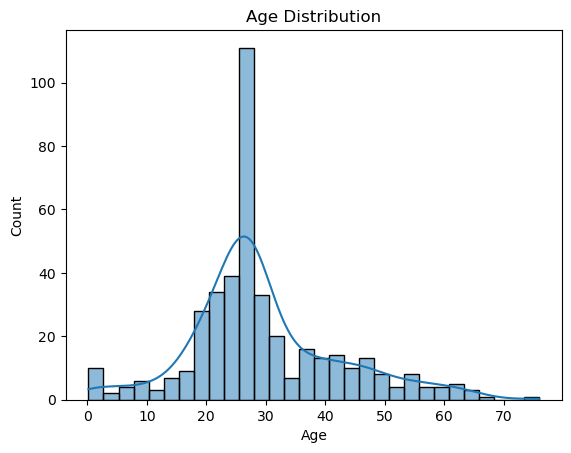

In [105]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

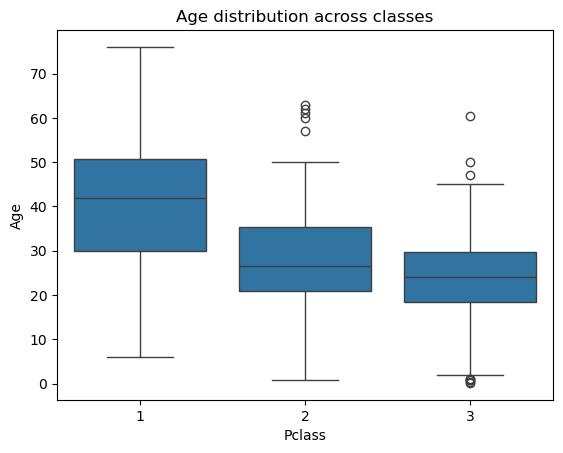

In [71]:
# Box plots of 'Age' 
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age distribution across classes')
plt.show()

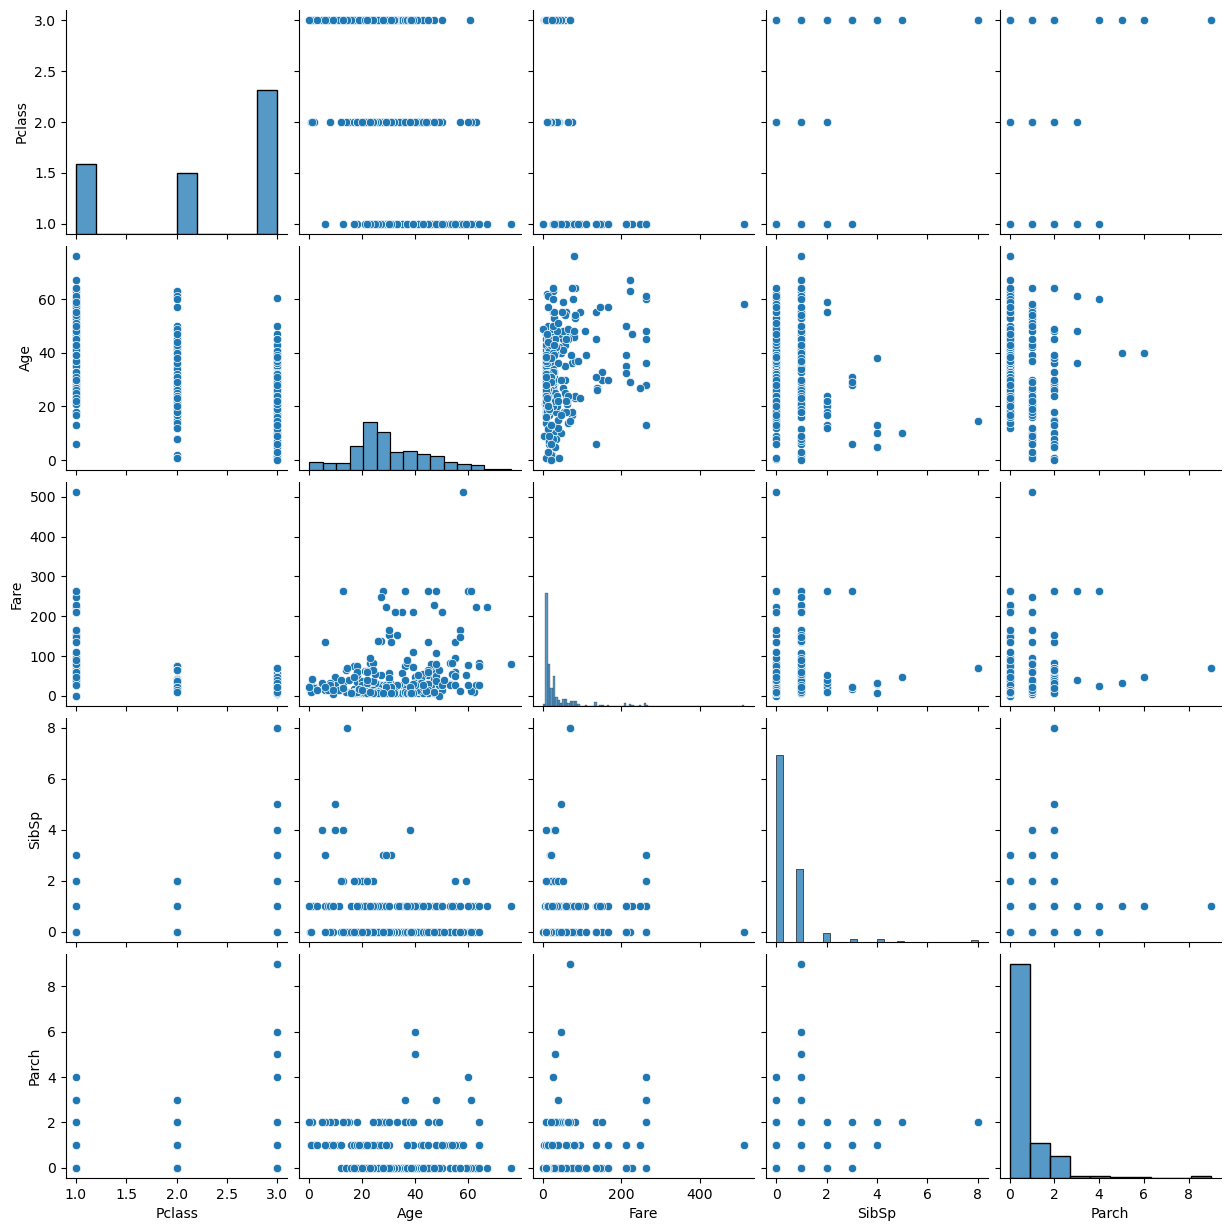

In [77]:
# Visualize relationships with a pair plot
sns.pairplot(df[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

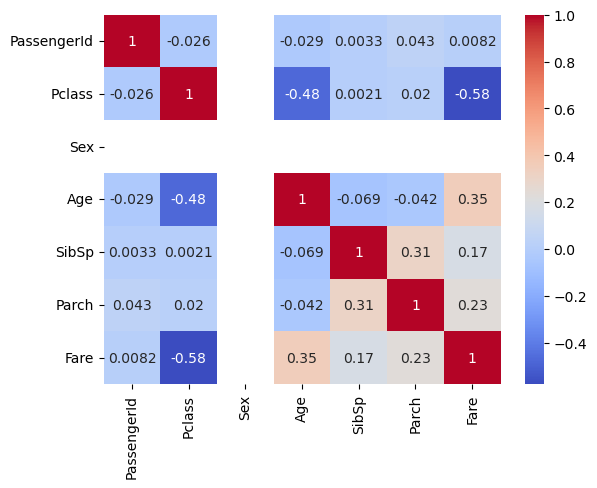

In [107]:
# Correlation heatmap
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix using only the numeric columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

2. Data Preprocessing:

In [114]:
# Handle missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)  # Fill missing Age with mean
df['Fare'].fillna(df['Fare'].median(), inplace=True)  # Fill missing Fare with median


# Handle missing values in 'Embarked'
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill with mode

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Map with reference category


3. Model Building:

In [50]:
print(df.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the Titanic training dataset
df_train = pd.read_csv('Titanic_train.csv')

# Prepare features and target variable
y = df_train['Survived']  # This is your target variable
X = df_train.drop(columns=['Survived', 'PassengerId', 'Name', 'Cabin', 'Ticket'])  # Adjust columns as needed

# Handle missing values for the training dataset (same logic as before)
X['Age'].fillna(X['Age'].mean(), inplace=True)
X['Fare'].fillna(X['Fare'].median(), inplace=True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X['Embarked'] = X['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)




LogisticRegression()

In [128]:
# Make predictions
y_pred = model.predict(X_test_scaled)



In [130]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])



In [132]:
# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC Score: 0.8808236808236809


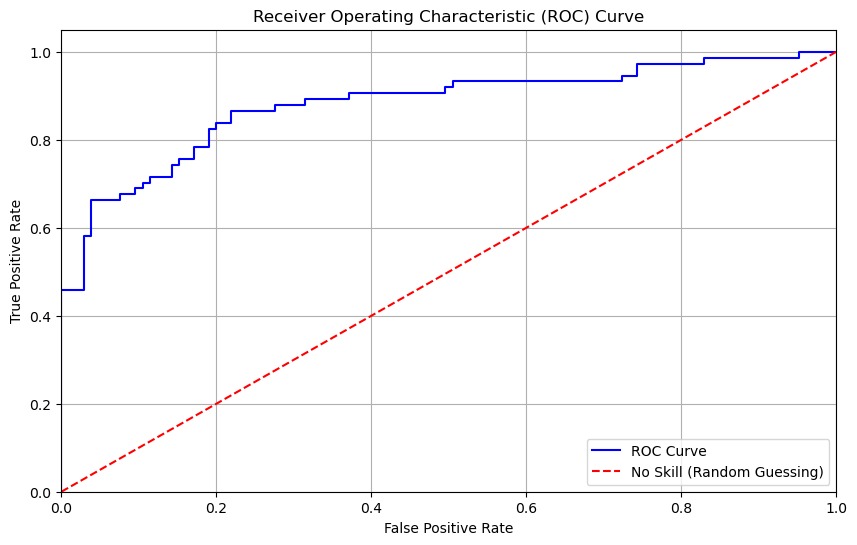

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='No Skill (Random Guessing)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [136]:
Interpret the Coefficients

SyntaxError: invalid syntax (3806157442.py, line 1)